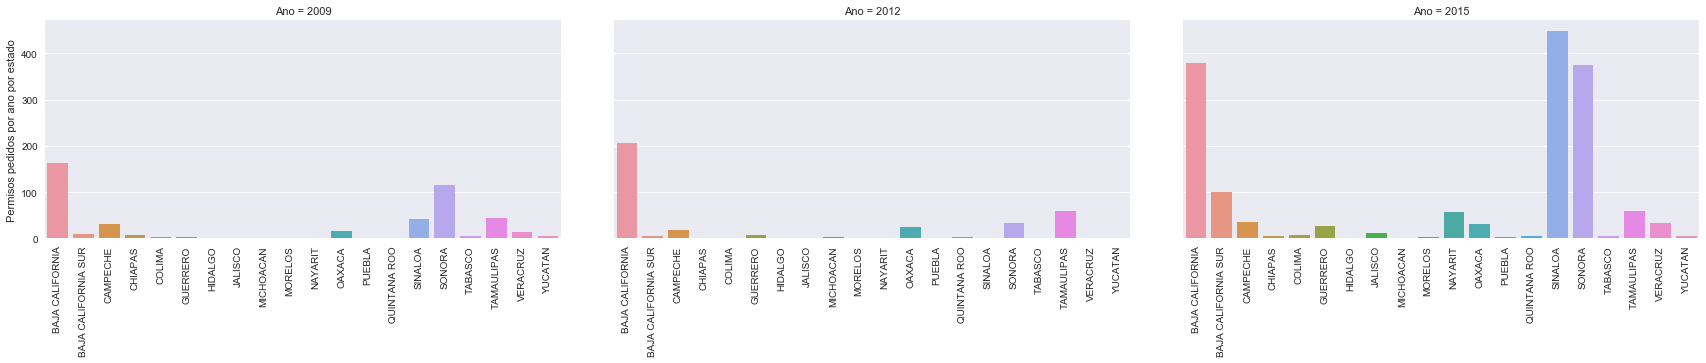

In [4]:
%matplotlib inline

import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(sum(map(ord, "aesthetics")))
sns.set()    
    
# TODO: bring all the CSV files for beneficiarios with its right description
#       cruzar con los permisos

#---------------¿La población atendida corresponde con la población objetivo del programa?---------------


# El cruce con el RNPA y después con la base de permisos nos ayuda a identificar algunas características. 

# 'RNPA', 'Embarcacion', 'Tipo', 'Municipio', 'Localidad', 'Estado', 'Ano_Construido'
activos = pandas.read_csv('../datos/activos.csv')

# 'Tipo', 'RNPA', 'Nombre', 'Fecha_Registro', 'Tipo_Persona', 'Representante_Legal', 'Estado', 'Municipio', 'Localidad', 'Inicio_Operaciones'
unidades = pandas.read_csv('../datos/unidades_economicas.csv')

# Permisos

# main_ID,Año,Entidad,Permisos,Concesiones
permisos_concesiones = pandas.read_csv('../datos/permisos_concesiones/permisos_concesiones.csv')

# Permisos Recibidas Distribuidas por Estado por Año
g1 = sns.factorplot(x="Entidad", y="Permisos", col="Ano", data=permisos_concesiones,kind="bar", ci=None, aspect=2)
(g1.set_axis_labels("", "Permisos pedidos por ano por estado").set_xticklabels(rotation=90))


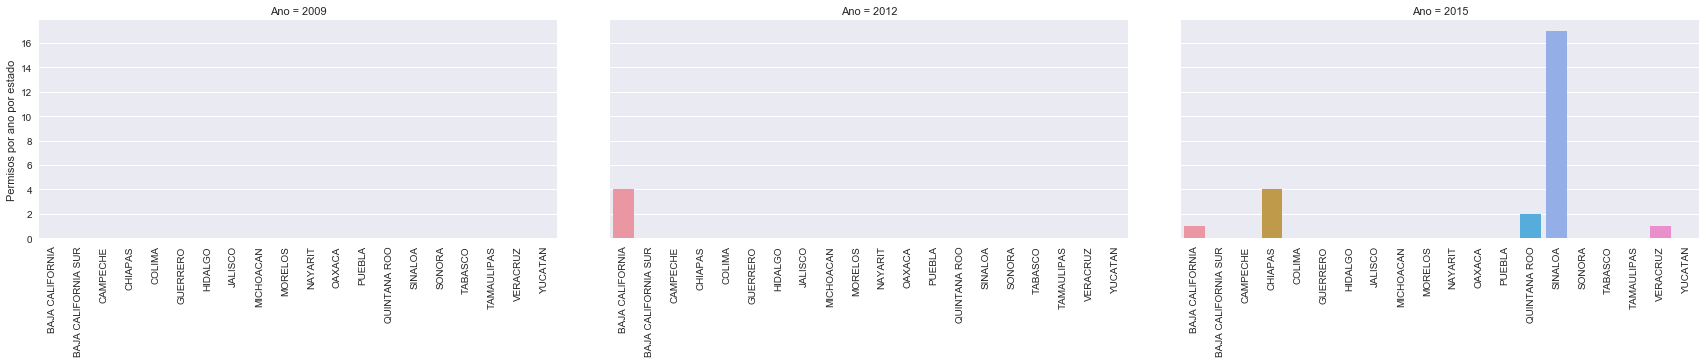

In [7]:
# Permisos Concedidas Distribuidas por Estado por Año
g2 = sns.factorplot(x="Entidad", y="Concesiones", col="Ano", data=permisos_concesiones,kind="bar", ci=None, aspect=2)
(g2.set_axis_labels("", "Permisos por ano por estado").set_xticklabels(rotation=90))


In [52]:
# Permisos
# main_ID,Estado,Municipio,Localidad,RNPA,Titular,Especie,Area,Inicio,Termino
permisos_embarcaciones_menores = pandas.read_csv('../datos/permisos_concesiones/embarcaciones_menores.csv')
permisos_embarcaciones_mayores = pandas.read_csv('../datos/permisos_concesiones/embarcaciones_mayores.csv')

############# En teoría, solo las personas con permiso pueden ser beneficiarios #############

# Beneficiarios de apoyo combustibles Diesel 2011 - 2015
# main_ID,Ano,Beneficiario,RFC,RNPA,Estado,Municipio,Localidad,Monto

diesel = pandas.read_csv('../datos/apoyos_subsidios/2011_2015_beneficiarios_diesel.csv')

# Une los beneficiarios con los permisos
beneficiarios_permisos = pandas.merge(diesel, permisos_embarcaciones_mayores, 
                                      on='RNPA', how='inner', suffixes=('_x', '_y'))

# Convertir las fechas a años
beneficiarios_permisos.tyear = pandas.to_datetime(beneficiarios_permisos['Termino']).dt.year
beneficiarios_permisos.iyear = pandas.to_datetime(beneficiarios_permisos['Inicio']).dt.year

# Chequea si quienes son beneficiarios tienen permiso ese año
beneficiarios_permisos['Tiene'] = np.where(((beneficiarios_permisos.Ano >= beneficiarios_permisos.iyear) & (beneficiarios_permisos.Ano <= beneficiarios_permisos.tyear)), True, False)

# Mostrar tabla de beneficios sin permiso con RNPA, fecha del permiso, año del beneficio
#beneficiarios_permisos.tail() # Beneficiario, 'Area', 'Especie','Ano', 'Inicio', 'Termino','Tiene'

bp = beneficiarios_permisos[['Beneficiario', 'RFC', 'Estado_x', 'Area', 'Especie','Ano', 'Inicio', 'Termino','Tiene']]

group_estado = bp.groupby(['Estado_x', 'Tiene'])
group_estado.size().plot(kind='bar')

KeyError: 'RNPA'

In [23]:
group_especie = bp.groupby(['Especie', 'Tiene'])
group_especie.size()

Especie                                                                           Tiene
ALMEJA CATARINA                                                                   True         1
ALMEJA CHIONE                                                                     True         2
ALMEJA GENEROSA                                                                   False        2
CALAMAR                                                                           True         1
CALAMAR GIGANTE                                                                   False        2
                                                                                  True       926
CALLO DE HACHA                                                                    True         1
CAM. Y ESC. ESTUARINA                                                             True      3696
CAMARON                                                                           True         1
CAMARON DE ESTERO                      

In [63]:
bp[['Ano', 'Estado_x', 'Tiene', 'RFC']].groupby(['Ano', 'Estado_x', 'Tiene']).count()


# counts = pd.DataFrame(group_ano, columns=['count'])


# df.groupby([df.index.date, 'action']).count().plot(kind='bar')

# g = sns.factorplot(x="Estado_x", y="Ano", col="Tiene",data=countsdf,kind="bar", ci=None, aspect=2)
# (g.set_axis_labels("", "Solicitues Recibidas").set_xticklabels(rotation=90))


RFC
Ano  Estado_x                        Tiene       
2011 BAJA CALIFORNIA                 False    234
                                     True    6045
     BAJA CALIFORNIA SUR             False     66
                                     True    1705
     CAMPECHE                        False    192
                                     True    4960
     CHIAPAS                         False     18
                                     True     465
     COLIMA                          False     12
                                     True     310
     DISTRITO FEDERAL                False     12
                                     True     310
     JALISCO                         False      6
                                     True     155
     NAYARIT                         False     30
                                     True     775
     OAXACA                          False     90
                                     True    2325
     QUINTANA ROO                    False      6
                                     True     155
     SINALOA                         False   1926
                                     True   49755
     SONORA                          False    804
                                     True   20770
     TABASCO                         False     24
                                     True     620
     TAMAULIPAS                      False    144
                                     True    3720
     VERACRUZ DE IGNACIO DE LA LLAVE False     66
                                     True    1705
...                                           ...
2012 SONORA                          True       1
     TABASCO                         True       1
     TAMAULIPAS                      True       0
     VERACRUZ DE IGNACIO DE LA LLAVE False      1
                                     True       0
     YUCATAN                         True       1
2013 BAJA CALIFORNIA                 True       4
     SINALOA                         True      21
     SONORA                          True      20
     TABASCO                         True       3
     TAMAULIPAS                      True       0
     VERACRUZ DE IGNACIO DE LA LLAVE True       8
     YUCATAN                         True      20
2014 BAJA CALIFORNIA                 False      0
                                     True       0
     SINALOA                         True       0
     SONORA                          True       0
     TABASCO                         True       0
     TAMAULIPAS                      True       0
     VERACRUZ DE IGNACIO DE LA LLAVE True       0
     YUCATAN                         True       0
2015 BAJA CALIFORNIA                 False      0
     SINALOA                         False      0
                                     True       0
     SONORA                          False      0
                                     True       0
     TABASCO                         False      0
     TAMAULIPAS                      False      0
     VERACRUZ DE IGNACIO DE LA LLAVE True       0
     YUCATAN                         False      0

[65 rows x 1 columns]

In [18]:

# Beneficiarios con el mismo RFC y sus permisos por Especie
beneficiarios_permisos[['RFC','Especie','Tiene']].groupby('RFC').tail()

,RFC,Especie,Tiene
156,ODM971201ST1,ESCAMA DE AGUA DULCE,True
157,ODM971201ST1,CALAMAR GIGANTE,True
158,ODM971201ST1,ESCAMA,True
159,ODM971201ST1,ESTRELLA DE MAR,True
160,ODM971201ST1,ESCAMA DE AGUA DULCE,True
478,ACC070701IDA,ESCAMA DE AGUA DULCE,True
479,ACC070701IDA,CALAMAR GIGANTE,True
480,ACC070701IDA,ESCAMA,True
481,ACC070701IDA,ESTRELLA DE MAR,True
482,ACC070701IDA,ESCAMA DE AGUA DULCE,True


In [20]:
# Beneficiarios con el mismo RFC y sus permisos por Estado
beneficiarios_permisos[['RFC','Estado_x','Tiene']].groupby('RFC').tail()

,RFC,Estado_x,Tiene
156,ODM971201ST1,SONORA,True
157,ODM971201ST1,SONORA,True
158,ODM971201ST1,SONORA,True
159,ODM971201ST1,SONORA,True
160,ODM971201ST1,SONORA,True
478,ACC070701IDA,SONORA,True
479,ACC070701IDA,SONORA,True
480,ACC070701IDA,SONORA,True
481,ACC070701IDA,SONORA,True
482,ACC070701IDA,SONORA,True


In [28]:
# Contar cuantos no tienen permiso y cuantos Si
beneficiarios_permisos['Tiene'].value_counts()

True     143480
False      5573
Name: Tiene, dtype: int64

In [50]:
# En que año en que estado se dieron más beneficiarios sin permisos
df = pandas.DataFrame(beneficiarios_permisos.groupby(['Ano', 'Estado_x'])['Tiene'].value_counts())


In [30]:

# Cuantos beneficiarios por estado no tienen permiso
beneficiarios_permisos.groupby('Estado_x')['Tiene'].value_counts()



Estado_x                         Tiene
BAJA CALIFORNIA                  True      7605
                                 False      298
BAJA CALIFORNIA SUR              True      2171
                                 False       84
CAMPECHE                         True      7285
                                 False      282
CHIAPAS                          True       465
                                 False       18
COLIMA                           True       310
                                 False       12
DISTRITO FEDERAL                 True       465
                                 False       18
JALISCO                          True       155
                                 False        6
NAYARIT                          True      1085
                                 False       42
OAXACA                           True      2945
                                 False      114
QUINTANA ROO                     True       620
                                 False       24
S

In [72]:
# Beneficiarios de apoyo combustibles Gasolina 2011 - 2015
gasolina  = pandas.read_csv('../datos/apoyos_subsidios/2011_2015_beneficiarios_gasolina.csv')

# Une los beneficiarios con los permisos
beneficiarios_gasolina_permisos = pandas.merge(gasolina, permisos_embarcaciones_menores,  on='RNPA', how='inner', suffixes=('_x', '_y'))

# Convertir las fechas a años
beneficiarios_gasolina_permisos.tyear = pandas.to_datetime(beneficiarios_gasolina_permisos['Termino']).dt.year
beneficiarios_gasolina_permisos.iyear = pandas.to_datetime(beneficiarios_gasolina_permisos['Inicio']).dt.year

# Chequea si quienes son beneficiarios tienen permiso ese año
beneficiarios_gasolina_permisos['Tiene'] = np.where(((beneficiarios_gasolina_permisos.Ano >= beneficiarios_gasolina_permisos.iyear) & (beneficiarios_gasolina_permisos.Ano <= beneficiarios_gasolina_permisos.tyear)), True, False)

beneficiarios_gasolina_permisos[['RNPA', 'Beneficiario','Titular', 'RFC', 'Estado_x', 'Ano','Inicio', 'Termino', 'Tiene']].head()


,RNPA,Beneficiario,Titular,RFC,Estado_x,Ano,Inicio,Termino,Tiene
0,203011457,ROBERTO CARLOS ASCENCIO PATIÑO,"SUR PACIFIC, S.P.R. DE R.L.",NaN,BAJA CALIFORNIA,2014,2011-12-13,2015-12-12,True
1,203011457,ROBERTO CARLOS ASCENCIO PATIÑO,"SUR PACIFIC, S.P.R. DE R.L.",NaN,BAJA CALIFORNIA,2014,2013-12-19,2023-12-18,True
2,203011457,ROBERTO CARLOS ASCENCIO PATIÑO,"SUR PACIFIC, S.P.R. DE R.L.",NaN,BAJA CALIFORNIA,2014,2012-08-16,2014-08-15,True
3,203011457,ROBERTO CARLOS ASCENCIO PATIÑO,"SUR PACIFIC, S.P.R. DE R.L.",NaN,BAJA CALIFORNIA,2014,2012-08-16,2014-08-15,True
4,203011457,ROBERTO CARLOS ASCENCIO PATIÑO,"SUR PACIFIC, S.P.R. DE R.L.",NaN,BAJA CALIFORNIA,2014,2013-09-24,2015-04-30,True


In [74]:
beneficiarios_gasolina_permisos.groupby('Tiene').size()

Tiene
False     1759
True     21441
dtype: int64

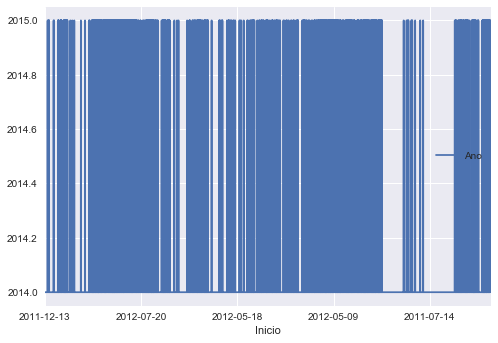

In [79]:
#beneficiarios_gasolina_permisos.plot(x='Inicio', y='Ano', kind='line')

In [ ]:

# Beneficiarios de apoyo a motores eléctricos

# 2011_Beneficiarios Eléctricos

# 2011_beneficiarios_electricos.csv

# Beneficiarios de apoyo 

# 2008_2012 Beneficiarios Motores

# Beneficiarios de apoyo 

# 2011_2015 Beneficiarios Modernización Embarcaciones Menores
# 2014_2015 Beneficiarios Modernización Embarcaciones Mayores
# 2014_2015 Beneficiarios Modernización Embarcaciones Mayores
# 2008_2011 Beneficiarios componente infraestructura (Reconversión)
# 2012 Beneficiarios componente infraestructura (Integral)
# 2011_2012 Beneficiarios componente Pesca